# TASK 1

American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals. The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.

A lot of recent progress has been made towards developing computer vision systems that translate sign language to spoken language. This technology often relies on complex neural network architectures that can detect subtle patterns in streaming video. However, as a first step, towards understanding how to build a translation system, we can reduce the size of the problem by translating individual letters, instead of sentences.

In this notebook, we will train a convolutional neural network to classify images of American Sign Language (ASL) letters. After loading, examining, and preprocessing the data, we will train the network and test its performance.

In the code cell below, we load the training and test data.

x_train and x_test are arrays of image data with shape (num_samples, 3, 50, 50), corresponding to the training and test datasets, respectively.

y_train and y_test are arrays of category labels with shape (num_samples,), corresponding to the training and test datasets, respectively.

In [1]:
import random
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""

Using TensorFlow backend.


"\n    num_types = len(data['target_names'])\n    targets = np_utils.to_categorical(np.array(data['target']), num_types)\n"

In [2]:
(x_train,y_train), (x_test,y_test) = load_data()

# TASK 2

Visualize the training data

Now we'll begin by creating a list of string-valued labels containing the letters that appear in the dataset. Then, we visualize the first several images in the training data, along with their corresponding labels.

Task 2: Instructions

Use matplotlib to visualize some of the images in the training dataset.
Assign labels to a Python list with three items: 'A', 'B', and 'C', corresponding to the signed letters that appear in the images.

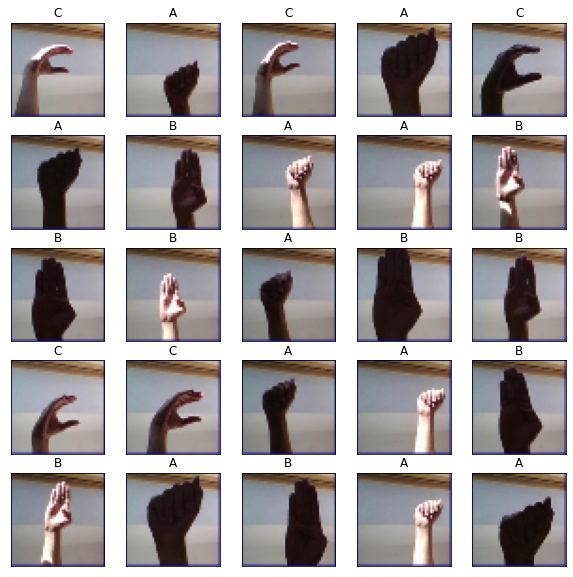

In [3]:
import matplotlib.pyplot as plt
labels = ['A', 'B', 'C']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(labels[label_index])
plt.show()

In [4]:
print(x_train.shape)

(1600, 50, 50, 3)


In [5]:
print(y_train.shape)

(1600,)


# TASK 3

Each entry in y_train and y_test is one of 0, 1, or 2, corresponding to the letters 'A', 'B', and 'C', respectively.

In [6]:
num_B_train = np.count_nonzero(y_train == 1)
print("Training B:{}".format(num_B_train))
num_C_train = np.count_nonzero(y_train == 2)
print("Training C:{}".format(num_C_train))
num_B_test = np.count_nonzero(y_test == 1)
print("Test B:{}".format(num_B_test))
num_C_test = np.count_nonzero(y_test == 2)
print("Test C:{}".format(num_C_test))

Training B:528
Training C:532
Test B:144
Test C:138


# TASK 4

Currently, our labels for each of the letters are encoded as categorical integers, where 'A', 'B' and 'C' are encoded as 0, 1, and 2, respectively. However, recall that Keras models do not accept labels in this format, and we must first one-hot encode the labels before supplying them to a Keras model.

This conversion will turn the one-dimensional array of labels into a two-dimensional array.
Each row in the two-dimensional array of one-hot encoded labels corresponds to a different image. The row has a 1 in the column that corresponds to the correct label, and 0 elsewhere.

For instance,

0 is encoded as [1, 0, 0],

1 is encoded as [0, 1, 0], and

2 is encoded as [0, 0, 1].

In [7]:
from keras.utils import to_categorical
y_train_OH = to_categorical(y_train)
print(y_train)
print(y_train_OH)
y_test_OH = to_categorical(y_test)
print(y_test)
print(y_test_OH)

[2 0 2 ... 0 2 2]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[1 2 1 2 1 0 2 0 1 1 2 0 1 2 2 0 1 0 0 1 1 0 1 1 1 2 1 1 0 2 2 2 1 2 1 0 0
 2 2 2 1 1 0 0 1 2 0 0 2 2 1 2 0 1 0 0 2 2 1 1 1 2 1 0 1 0 1 2 2 0 0 2 2 1
 1 0 1 1 0 2 1 1 2 2 2 0 2 0 0 2 2 0 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 0 1 0 0
 0 1 2 2 0 0 2 1 1 2 1 2 0 2 2 2 1 0 2 0 1 0 0 1 2 1 0 0 2 1 1 0 1 0 1 2 0
 2 2 0 1 2 1 1 1 2 2 0 2 2 2 0 1 1 1 0 0 2 2 2 1 2 1 1 1 0 1 2 2 0 2 0 2 0
 1 0 2 1 1 2 1 1 2 2 0 2 2 1 2 1 0 2 1 2 0 2 0 0 0 2 0 1 0 0 1 2 2 2 2 1 0
 2 2 2 1 1 0 1 0 1 1 0 2 1 0 2 0 0 2 0 0 0 1 1 1 2 2 1 0 2 1 1 2 0 0 0 2 0
 1 2 2 0 2 0 1 1 0 2 1 2 0 1 0 2 1 1 1 1 2 1 1 2 0 2 0 1 0 2 1 0 2 2 0 2 1
 2 1 2 1 1 0 1 1 1 2 0 1 0 2 2 2 1 1 1 1 1 0 1 0 2 1 0 0 2 1 0 2 0 1 2 0 2
 1 1 2 2 0 2 2 0 2 1 2 0 2 2 0 2 2 0 1 1 1 0 2 2 1 1 1 2 2 2 1 1 0 1 1 2 0
 0 1 0 1 1 1 2 1 1 1 2 2 2 0 1 0 2 1 1 1 0 0 2 0 2 1 1 0 2 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Add a max pooling layer (pooling over windows of size 4x4).

Add another convolutional layer (15 filters, kernel size of 5, same padding, relu activation).

Add another max pooling layer (pooling over windows of size 4x4).

# TASK 5

This network accepts an image of an American Sign Language letter as input. The output layer returns the network's predicted probabilities that the image belongs in each category.
Task 5: Instructions

Specify a convolutional neural network in Keras.

The first convolutional layer in the network has already been provided in the code. Add a max pooling layer (pooling over windows of size 4x4).

Add another convolutional layer (15 filters, kernel size of 5, same padding, relu activation).

Add another max pooling layer (pooling over windows of size 4x4).

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train_OH,y_validate = train_test_split(x_train,y_train_OH,test_size=0.2)
print(x_train.shape)
print(x_validate.shape)

(1280, 50, 50, 3)
(320, 50, 50, 3)


In [9]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
def myModel():
    model = Sequential()
    # First convolutional layer accepts image input
    model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
    # Add a max pooling layer
    model.add(MaxPooling2D(pool_size=4))
    # Add a convolutional layer
    model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))
    # Add another max pooling layer
    model.add(MaxPooling2D(pool_size=4))
    # Flatten and feed to output layer
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
#     input_shape = x_train.shape
#     model.build(input_shape)
#     model.add(MaxPooling2D(pool_size = (4,4)))
#     #model.add(Flatten())
#     model.add(Conv2D(15, (5,5),padding='SAME', input_shape = (50,50,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size = (4,4)))
    
    #model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.RMSprop(lr = 0.001),metrics=['accuracy'])
    return model

In [10]:
model = myModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 5)         380       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        1890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 408       
Total params: 2,678
Trainable params: 2,678
Non-trainable params: 0
____________________________________________________

# TASK 6

Compile the model with the 'rmsprop' optimizer, 'categorical_crossentropy' as the loss function, and 'accuracy' as a metric.

In [11]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
#history = model.fit(x_train, y_train_OH, batch_size = 32, epochs = 2, validation_data = (x_validate, y_validate))

# TASK 7

In [13]:
history = model.fit(x_train, y_train_OH,
                    epochs = 2,
                    batch_size = 32,
                    validation_data = (x_validate, y_validate))

Train on 1280 samples, validate on 320 samples
Epoch 1/2
1280/1280 [==============================] - 2s 2ms/step - loss: 0.9913 - accuracy: 0.5867 - val_loss: 0.8254 - val_accuracy: 0.7250
Epoch 2/2
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6754 - accuracy: 0.7602 - val_loss: 0.5792 - val_accuracy: 0.7750


# TASK 8

In [14]:
eval_loss, eval_acc = model.evaluate(x_test, y_test_OH)
print('Evaluation Loss: {:.4f}, Evaluation Accuracy: {:.2f}'.format(eval_loss, eval_acc * 100))


400/400 [==============================] - 0s 551us/step
Evaluation Loss: 0.5677, Evaluation Accuracy: 81.00


In [15]:
#Predictions for the test data
predicted_classes = model.predict_classes(x_test)

In [16]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score*100)

Accuracy Score =  81.0


# TASK 9

Visualize mistakes

Hooray! Our network gets very high accuracy on the test set!

The final step is to take a look at the images that were incorrectly classified by the model. Do any of the mislabeled images look relatively difficult to classify, even to the human eye?
Sometimes, it's possible to review the images to discover special characteristics that are confusing to the model. However, it is also often the case that it's hard to interpret what the model had in mind!.

Task 9: Instructions
Visualize images that were incorrectly classified by the model.

Use the model's .predict() method to assign y_probs to a numpy array with shape (600, 3) containing the model's predicted probabilities that each image belongs to each image class.

Assign y_preds to the model's predicted labels for each image in the testing dataset. Note that y_preds should be a numpy array with shape (600,), where each entry is one of 0, 1, or 2, corresponding to 'A', 'B', and 'C', respectively.

Use the ground truth labels for the testing dataset (y_test) and the model's predicted labels (y_preds) to determine which images were misclassified. Assign the variable bad_test_idxs to a one-dimensional numpy array containing all indices corresponding to images that were incorrectly classified by the model.

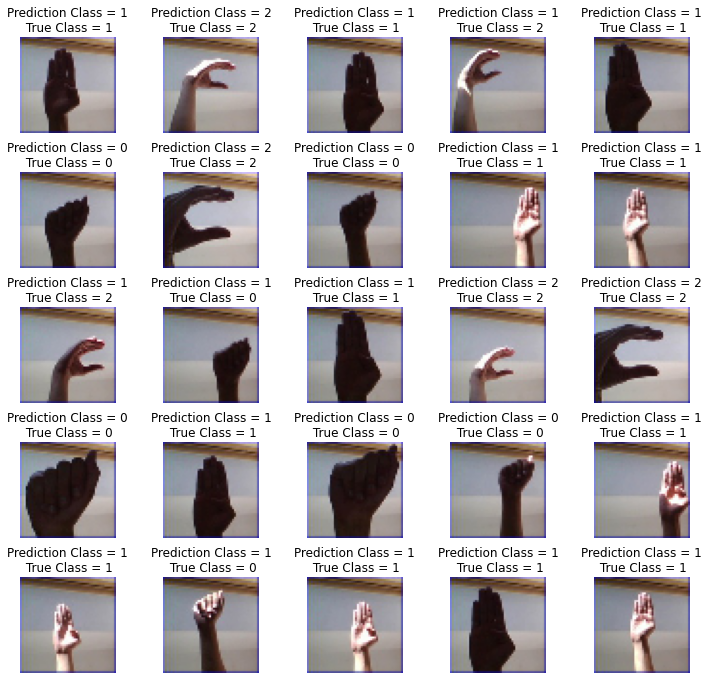

In [17]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    np.set_printoptions(precision=2)
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:}\n True Class = {y_test[i]:}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [18]:
# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = np.argmax(y_probs, axis=1)

# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.where(y_preds != y_test)[0]

fig, ax = plt.subplots(10, 10, figsize = (500,300))
ax = ax.ravel()

# Print mislabeled examples
#fig = plt.figure(figsize=(500,80))
for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, int(np.ceil(len(bad_test_idxs)/2)), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))